# Tugas 4 - Graph

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



1. **`!pip install Sastrawi`**:
   - Menginstal library **Sastrawi**, yang digunakan untuk stemming (mengubah kata menjadi bentuk dasar) dalam bahasa Indonesia.

2. **`import nltk`**:
   - Mengimpor library **NLTK (Natural Language Toolkit)**, yang digunakan untuk pengolahan teks, seperti tokenisasi.

3. **`nltk.download('punkt')`**:
   - Mengunduh paket **'punkt'** dari NLTK, yang dibutuhkan untuk proses tokenisasi teks.

4. **Import library lainnya**:
   - **Pandas**: Untuk manipulasi dan analisis data berbentuk tabel.
   - **NumPy**: Untuk operasi numerik.
   - **Re**: Untuk manipulasi teks menggunakan ekspresi reguler.
   - **Stopwords**: Untuk menghapus kata-kata umum (stopwords) dari teks.
   - **Sastrawi**: Untuk stemming bahasa Indonesia.
   - **TfidfVectorizer**: Untuk menghitung nilai TF-IDF pada teks.
   - **Cosine Similarity**: Untuk mengukur kesamaan antar dokumen.
   - **NetworkX**: Untuk analisis dan visualisasi grafik jaringan.
   - **Matplotlib**: Untuk membuat grafik atau visualisasi data.

**Tujuan**: Mengimpor dan mempersiapkan library yang diperlukan untuk melakukan berbagai proses analisis teks, seperti pembersihan data, transformasi teks ke nilai TF-IDF, penghitungan kesamaan dokumen, dan visualisasi.

In [ ]:
# Install dan import modul yang diperlukan
!pip install Sastrawi
import nltk

# Pastikan untuk mengunduh 'punkt' yang dibutuhkan NLTK
nltk.download('punkt')

# Import library lain yang dibutuhkan
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

# ...lanjutkan dengan kode lainnya


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.




1. **`df = pd.read_csv(...)`**:
   - Membaca file **CSV** berisi data berita dari lokasi tertentu di Google Drive. File ini kemudian dimuat ke dalam DataFrame **Pandas** untuk memudahkan analisis.

2. **`df.head()`**:
   - Menampilkan 5 baris pertama dari DataFrame untuk memberikan gambaran isi data, seperti kolom yang tersedia dan sampel datanya.

**Tujuan**: Memuat data berita ke dalam DataFrame.

In [ ]:
# Baca file CSV
df = pd.read_csv("/content/drive/MyDrive/PPW-A/report/Tugas-PPW-A/data_berita_detik.csv")
df.head()

,judul,tanggal,isi,kategori
0,"Media Golf Day Dahulu, BNI Indonesian Masters ...","Kamis, 17 Okt 2024 02:02 WIB",Jakarta - Turnamen golf BNI Indonesian Masters...,Olahraga
1,Denmark Open 2024: Ahsan/Hendra Takluk dari Je...,"Kamis, 17 Okt 2024 00:22 WIB",Odense - Mohammad Ahsan/Hendra Setiawan tersin...,Olahraga
2,Denmark Open 2024: Ginting Tersingkir di Babak...,"Rabu, 16 Okt 2024 22:42 WIB",Odense - Anthony Sinisuka Ginting tersingkir d...,Olahraga
3,Denmark Open 2024: Rinov/Pitha Tundukkan Wakil...,"Rabu, 16 Okt 2024 22:15 WIB",Odense - Rinov Rivaldy/Pitha Haningtyas Mentar...,Olahraga
4,Umar Abdullah Wakili Indonesia di FIA Motorspo...,"Rabu, 16 Okt 2024 22:15 WIB",Jakarta - Bakal ada pebalap Indonesia tampil d...,Olahraga




1. **`sample_berita = df['isi'].iloc[4]`**:
   - Mengambil teks berita dari kolom **`'isi'`** di baris ke-4 (indeks dimulai dari 0). Dengan kata lain, ini mengambil satu sampel berita dari dataset.

2. **`print(sample_berita)`**:
   - Mencetak isi teks berita yang diambil ke layar.

**Tujuan**: Menyimpan dan menampilkan salah satu berita dari dataset untuk ditinjau atau digunakan lebih lanjut.

In [ ]:
# mengambil satu sample berita
sample_berita = df['isi'].iloc[4]
print(sample_berita)

Jakarta - Bakal ada pebalap Indonesia tampil di Eropa akhir bulan ini. Dia adalah Umar Abdullah yang turun di FIA Motorsport Games 2024 Valencia. Ajang tersebut digelar di Valencia, 23-27 Oktobeer. Umar yang merupakan pebalap Delta Garage Racing Team ditunjuk oleh Waketum IMI Pusat bidang Olahraga Mobil Ananda Mikola. FIA Motorsport layaknya Olimpiade karena mempertandingkan banyak cabang olahraga motor. Umar akan menggunakan mobil spesifikasi TCR dari merk yang bukan biasa dipakainya di ajang balapan. Dia sudah menyiapkan wear pack (baju balap) dengan dominasi warna merah-putih dipadukan dengan hitam. " Iya, kayak Olimpiade. Tapi ini khusus balap, di bawah FIA. Dari olahraga balap roda empat hanya saya, sama ada satu lagi dari gokart," ungkap Umar dalam rilis kepada detikSport. "Kayak TCR World. Perwakilan peserta dari seluruh dunia yang memiliki pembalap TCR," lanjutnya. Untuk persiapan menuju FIA Motorsport Games 2024, Umar sampai harus berangkat ke Milan, Italia, akhir pekan ini. d


1. **`result_list = []`**:
   - Membuat list kosong untuk menyimpan hasil pemisahan kalimat dari teks berita.

2. **`sentences = sample_berita.split('.')`**:
   - Memisahkan teks berita menjadi kalimat-kalimat berdasarkan tanda titik (`.`).

3. **`sentences = [s.strip() for s in sentences if s.strip()]`**:
   - Membersihkan setiap kalimat dari spasi berlebih dan menghapus entri kosong.

4. **`for i, sentence in enumerate(sentences, 1):`**:
   - Melakukan iterasi untuk setiap kalimat yang telah dipisahkan.
   - **`result_list.append(...)`**:
     - Menyimpan setiap kalimat ke dalam **`result_list`** dalam bentuk dictionary berisi:
       - **`kalimat ke n`**: Label untuk menunjukkan nomor kalimat.
       - **`kalimat`**: Isi teks dari kalimat tersebut.

5. **`result_df = pd.DataFrame(result_list)`**:
   - Mengonversi hasil pemisahan kalimat menjadi sebuah DataFrame agar lebih mudah dianalisis atau dilihat.

6. **`result_df`**:
   - Menampilkan DataFrame berisi daftar kalimat dengan nomor urutnya.

**Tujuan**: Memisahkan teks berita menjadi kalimat-kalimat yang terstruktur dan menyimpannya dalam DataFrame.

In [ ]:
# Membuat list untuk menyimpan hasil
result_list = []

# Pisahkan kalimat berdasarkan titik
sentences = sample_berita.split('.')  # Pisahkan kalimat berdasarkan titik
sentences = [s.strip() for s in sentences if s.strip()]  # Hilangkan spasi berlebih dan kosong

# Looping untuk menambahkan setiap kalimat ke result_list
for i, sentence in enumerate(sentences, 1):
    result_list.append({'kalimat ke n': f"Kalimat ke {i}", 'kalimat': sentence})

# Membuat DataFrame dari hasil pemisahan
result_df = pd.DataFrame(result_list)

# Tampilkan DataFrame
result_df

,kalimat ke n,kalimat
0,Kalimat ke 1,Jakarta - Bakal ada pebalap Indonesia tampil d...
1,Kalimat ke 2,Dia adalah Umar Abdullah yang turun di FIA Mot...
2,Kalimat ke 3,"Ajang tersebut digelar di Valencia, 23-27 Okto..."
3,Kalimat ke 4,Umar yang merupakan pebalap Delta Garage Racin...
4,Kalimat ke 5,FIA Motorsport layaknya Olimpiade karena mempe...
5,Kalimat ke 6,Umar akan menggunakan mobil spesifikasi TCR da...
6,Kalimat ke 7,Dia sudah menyiapkan wear pack (baju balap) de...
7,Kalimat ke 8,""" Iya, kayak Olimpiade"
8,Kalimat ke 9,"Tapi ini khusus balap, di bawah FIA"
9,Kalimat ke 10,"Dari olahraga balap roda empat hanya saya, sam..."




1. **Mengunduh dan Mendefinisikan Stopwords**:
   - **`nltk.download('stopwords')`**: Mengunduh daftar stopwords untuk bahasa Indonesia.
   - **`stop_words`**: Mengambil daftar kata umum (stopwords) dalam bahasa Indonesia.

2. **Fungsi Preprocessing**:
   - **`remove_url(data_berita)`**: Menghapus URL dari teks.
   - **`remove_html(data_berita)`**: Menghapus tag HTML dari teks.
   - **`remove_emoji(data_berita)`**: Menghapus emoji dari teks.
   - **`remove_numbers(data_berita)`**: Menghapus angka dari teks.
   - **`remove_symbols(data_berita)`**: Menghapus simbol atau karakter khusus selain huruf dan angka.
   - **`case_folding(text)`**: Mengubah semua huruf dalam teks menjadi huruf kecil.
   - **`tokenize(text)`**: Memecah teks menjadi kata-kata (token).
   - **`remove_stopwords(text)`**: Menghapus stopwords dari teks.
   - **`stemming(text)`**: Mengubah kata ke bentuk dasar (stem) menggunakan Sastrawi.

3. **Penerapan Preprocessing pada DataFrame**:
   - **`result_df['clean']`**: Secara berurutan, membersihkan setiap kalimat dari URL, HTML, emoji, simbol, angka, dan melakukan case folding.
   - **`result_df['tokenize']`**: Tokenisasi kalimat menjadi daftar kata.
   - **`result_df['stopword removal']`**: Menghapus stopwords dari token yang dihasilkan.
   - **`result_df['stemming']`**: Melakukan stemming pada kata-kata yang tersisa.

4. **Menggabungkan Kata**:
   - **`result_df['final']`**: Menggabungkan kembali hasil stemming menjadi satu string untuk setiap kalimat.

5. **Menampilkan DataFrame Final**:
   - Menampilkan kolom "Kalimat ke-n" dan hasil akhir preprocessing teks pada kolom **`final`**.

**Tujuan**: Membersihkan teks berita agar siap digunakan untuk analisis lebih lanjut seperti klasifikasi atau clustering. Setiap kalimat dalam berita diolah menjadi bentuk teks yang lebih bersih dan relevan untuk pemrosesan bahasa alami.

In [ ]:
# Download stopwords untuk bahasa Indonesia
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

# Fungsi preprocessing yang disesuaikan
def remove_url(data_berita):
    url = re.compile(r'https?://\S+|www\.S+')
    return url.sub(r'', data_berita)

def remove_html(data_berita):
    html = re.compile(r'<.#?>')
    return html.sub(r'', data_berita)

def remove_emoji(data_berita):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticon
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', data_berita)

def remove_numbers(data_berita):
    data_berita = re.sub(r'\d+', '', data_berita)
    return data_berita

def remove_symbols(data_berita):
    data_berita = re.sub(r'[^a-zA-Z0-9\s]', '', data_berita)
    return data_berita

def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    return text

def tokenize(text):
    return text.split()

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return [stemmer.stem(word) for word in text]

# Looping setiap kalimat di dataframe 'result_df'
result_df['clean'] = result_df['kalimat'].apply(remove_url)
result_df['clean'] = result_df['clean'].apply(remove_html)
result_df['clean'] = result_df['clean'].apply(remove_emoji)
result_df['clean'] = result_df['clean'].apply(remove_symbols)
result_df['clean'] = result_df['clean'].apply(remove_numbers)
result_df['clean'] = result_df['clean'].apply(case_folding)
result_df['tokenize'] = result_df['clean'].apply(tokenize)
result_df['stopword removal'] = result_df['tokenize'].apply(remove_stopwords)
result_df['stemming'] = result_df['stopword removal'].apply(stemming)

# Gabungkan kata setelah stemming
result_df['final'] = result_df['stemming'].apply(lambda x: ' '.join(x))

# Tampilkan hasil dataframe
result_df[['kalimat ke n', 'final']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,kalimat ke n,final
0,Kalimat ke 1,jakarta balap indonesia tampil eropa
1,Kalimat ke 2,umar abdullah turun fia motorsport games valencia
2,Kalimat ke 3,ajang gelar valencia oktobeer
3,Kalimat ke 4,umar balap delta garage racing team waketum im...
4,Kalimat ke 5,fia motorsport layak olimpiade tanding cabang ...
5,Kalimat ke 6,umar mobil spesifikasi tcr merk pakai ajang balap
6,Kalimat ke 7,wear pack baju balap dominasi warna merahputih...
7,Kalimat ke 8,iya kayak olimpiade
8,Kalimat ke 9,khusus balap fia
9,Kalimat ke 10,olahraga balap roda gokart umar rilis detiksport



1. **Gabungkan Kalimat**:
   - Menggabungkan semua teks yang sudah melalui proses **preprocessing** (hasil stemming) menjadi dokumen untuk setiap kalimat.

2. **Inisialisasi TF-IDF Vectorizer**:
   - Menggunakan **`TfidfVectorizer`** untuk menghitung skor TF-IDF dari setiap kata dalam dokumen.

3. **Transformasi Teks ke TF-IDF**:
   - Mengubah dokumen yang sudah diproses menjadi matriks TF-IDF. Setiap nilai di matriks merepresentasikan skor TF-IDF suatu kata dalam dokumen.

4. **Nama Fitur (Kata-Kata)**:
   - Mengambil daftar kata-kata unik (fitur) yang digunakan dalam representasi TF-IDF.

5. **Konversi ke DataFrame**:
   - Matriks TF-IDF diubah menjadi DataFrame, di mana:
     - **Kolom**: Kata-kata dari fitur TF-IDF.
     - **Baris**: Dokumen atau kalimat yang dianalisis.

6. **Tambahkan Identifikasi Kalimat**:
   - Menambahkan kolom **`kalimat ke n`** untuk menunjukkan kalimat mana yang diwakili oleh setiap baris.

7. **Output**:
   - Menampilkan DataFrame hasil TF-IDF, berisi skor relevansi setiap kata (fitur) untuk masing-masing kalimat.

**Tujuan**: Mengukur pentingnya setiap kata dalam konteks setiap kalimat (dokumen) untuk analisis lebih lanjut seperti peringkat relevansi, pencarian, atau klasifikasi.

In [ ]:
# Gabungkan semua kalimat hasil stemming menjadi dokumen untuk tiap kalimat
documents = result_df['final'].tolist()

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Terapkan TF-IDF ke dokumen (kalimat yang sudah dipreproses)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Mendapatkan nama-nama fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Mengubah hasil TF-IDF menjadi dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Tambahkan kolom 'no' dan 'kalimat ke n' untuk identifikasi
tfidf_df.insert(0, 'kalimat ke n', result_df['kalimat ke n'])

# Tampilkan dataframe dengan skor TF-IDF
tfidf_df

,kalimat ke n,abdullah,ajang,ananda,asia,baju,balap,berangkat,berani,bidang,...,team,terang,turun,umar,valencia,waketum,wakil,warna,wear,world
0,Kalimat ke 1,0.000000,0.000000,0.000000,0.000000,0.000000,0.254505,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Kalimat ke 2,0.457072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.457072,0.254749,0.363833,0.000000,0.000000,0.000000,0.000000,0.000000
2,Kalimat ke 3,0.000000,0.440378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.440378,0.000000,0.000000,0.000000,0.000000,0.000000
3,Kalimat ke 4,0.000000,0.000000,0.297171,0.000000,0.000000,0.156414,0.000000,0.000000,0.297171,...,0.297171,0.000000,0.000000,0.165629,0.000000,0.297171,0.000000,0.000000,0.000000,0.000000
4,Kalimat ke 5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Kalimat ke 6,0.000000,0.338488,0.000000,0.000000,0.000000,0.223818,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.237004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Kalimat ke 7,0.000000,0.000000,0.000000,0.000000,0.347586,0.182949,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.347586,0.347586,0.000000
7,Kalimat ke 8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Kalimat ke 9,0.000000,0.000000,0.000000,0.000000,0.000000,0.391181,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Kalimat ke 10,0.000000,0.000000,0.000000,0.000000,0.000000,0.230345,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.243915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Menghitung tingkat kesamaan antar kalimat berdasarkan representasi **TF-IDF** menggunakan **cosine similarity**:

1. **Hitung Cosine Similarity**:
   - **Cosine similarity** mengukur kemiripan antar vektor berdasarkan sudut antar vektor.
   - Di sini, setiap kalimat diwakili oleh vektor TF-IDF, lalu dihitung kemiripannya dengan kalimat lain.

2. **Buat DataFrame untuk Hasil**:
   - Hasil cosine similarity disimpan dalam bentuk **matriks**:
     - **Baris dan Kolom**: Mewakili setiap kalimat.
     - **Nilai Matriks**: Nilai cosine similarity antara dua kalimat, dengan rentang 0 (tidak mirip) hingga 1 (sangat mirip).

3. **Output**:
   - Matriks **cosine similarity** ditampilkan dalam bentuk DataFrame, di mana:
     - Setiap nilai memperlihatkan tingkat kemiripan antara dua kalimat tertentu.

**Tujuan**: Matriks ini berguna untuk analisis hubungan antar kalimat, seperti menemukan kalimat yang mirip, clustering, atau membuat rangkuman teks.

In [ ]:
# Menghitung cosine similarity antar kalimat berdasarkan TF-IDF
cosine_sim = cosine_similarity(tfidf_matrix)

# Membuat dataframe untuk menyimpan hasil cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks cosine similarity
cosine_sim_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,...,Kalimat ke 12,Kalimat ke 13,Kalimat ke 14,Kalimat ke 15,Kalimat ke 16,Kalimat ke 17,Kalimat ke 18,Kalimat ke 19,Kalimat ke 20,Kalimat ke 21
kalimat ke n,,,,,,,,,,,,,,,,,,,,,
Kalimat ke 1,1.000000,0.000000,0.000000,0.039808,0.000000,0.056963,0.046562,0.000000,0.099558,0.058624,...,0.061076,0.000000,0.000000,0.000000,0.000000,0.022946,0.000000,0.254505,0.000000,0.0
Kalimat ke 2,0.000000,1.000000,0.160224,0.042194,0.191605,0.060377,0.000000,0.000000,0.181192,0.062137,...,0.000000,0.380064,0.117447,0.000000,0.093309,0.024321,0.045878,0.000000,0.056520,0.0
Kalimat ke 3,0.000000,0.160224,1.000000,0.000000,0.000000,0.149063,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.112940,0.000000,0.113268,0.000000,0.000000,0.0
Kalimat ke 4,0.039808,0.042194,0.000000,1.000000,0.073992,0.172271,0.028616,0.000000,0.061186,0.158833,...,0.037536,0.035653,0.111032,0.000000,0.000000,0.266794,0.029828,0.156414,0.036747,0.0
Kalimat ke 5,0.000000,0.191605,0.000000,0.073992,1.000000,0.000000,0.000000,0.196353,0.155776,0.108966,...,0.000000,0.161901,0.100973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Kalimat ke 6,0.056963,0.060377,0.149063,0.172271,0.000000,1.000000,0.040947,0.000000,0.087553,0.109364,...,0.157126,0.051016,0.000000,0.000000,0.000000,0.081658,0.129744,0.223818,0.052583,0.0
Kalimat ke 7,0.046562,0.000000,0.000000,0.028616,0.000000,0.040947,1.000000,0.000000,0.071566,0.042142,...,0.043904,0.000000,0.000000,0.000000,0.000000,0.016495,0.000000,0.182949,0.000000,0.0
Kalimat ke 8,0.000000,0.000000,0.000000,0.000000,0.196353,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131905,0.000000,0.000000,0.0
Kalimat ke 9,0.099558,0.181192,0.000000,0.061186,0.155776,0.087553,0.071566,0.000000,1.000000,0.090107,...,0.093876,0.153102,0.000000,0.000000,0.000000,0.035269,0.000000,0.391181,0.000000,0.0


Gambar tersebut adalah **matriks cosine similarity** yang menunjukkan tingkat kesamaan antar kalimat dalam dokumen. Berikut penjelasannya:

1. **Baris dan Kolom**:
   - Setiap baris dan kolom merepresentasikan kalimat tertentu, yang diberi label seperti "Kalimat ke 16", "Kalimat ke 17", dan seterusnya.

2. **Nilai Matriks**:
   - Nilai pada posisi \((i, j)\) menunjukkan tingkat kemiripan antara **Kalimat ke-i** dan **Kalimat ke-j**.
   - Nilai berkisar antara 0 hingga 1:
     - **0**: Tidak ada kemiripan sama sekali.
     - **1**: Kalimat identik atau sangat mirip.
   - Misalnya, nilai 0.254505 di baris "Kalimat ke 19" dan kolom "Kalimat ke 16" berarti **Kalimat ke 19** memiliki kemiripan 25.45% dengan **Kalimat ke 16**.

3. **Diagonal Matriks**:
   - Nilai diagonal (misalnya, "Kalimat ke 16" dengan "Kalimat ke 16") selalu 1 karena kalimat tersebut dibandingkan dengan dirinya sendiri.

**Tujuan**:
- Matriks ini berguna untuk menganalisis kemiripan antar kalimat, misalnya:
  - Mencari kalimat yang paling mirip.
  - Menentukan keterkaitan antar kalimat untuk membuat rangkuman atau membangun struktur teks.

**matriks adjacency** berdasarkan matriks cosine similarity untuk menentukan hubungan antar kalimat dengan ambang batas (**threshold**) tertentu. Berikut penjelasannya:

1. **Threshold (Ambang Batas)**:
   - Ditentukan nilai ambang batas \( \text{threshold} = 0.5 \).
   - Jika nilai cosine similarity antara dua kalimat \( \geq 0.5 \), maka dianggap **berhubungan** (ditandai dengan nilai 1 di matriks adjacency).
   - Jika \( < 0.5 \), maka dianggap **tidak berhubungan** (ditandai dengan nilai 0).

2. **Adjacency Matrix**:
   - Matriks yang menunjukkan hubungan antar kalimat berdasarkan cosine similarity.
   - Baris dan kolom mewakili kalimat, dan setiap nilai menunjukkan hubungan:
     - **1**: Kalimat saling berhubungan.
     - **0**: Kalimat tidak berhubungan.

3. **Hasil**:
   - Matriks adjacency disimpan dalam **DataFrame** (`adjacency_df`) untuk mempermudah interpretasi dan menampilkan hubungan antar kalimat.
   - Matriks ini dapat digunakan untuk analisis graf atau menemukan kelompok kalimat yang saling terkait (clustering).

**Contoh Interpretasi**:
- Jika pada baris "Kalimat ke 16" dan kolom "Kalimat ke 19" terdapat nilai **1**, berarti **Kalimat ke 16** dan **Kalimat ke 19** memiliki cosine similarity \( \geq 0.5 \), sehingga dianggap berhubungan.

In [ ]:
# Tetapkan ambang batas (threshold) 0.7
threshold = 0.5

# Buat matriks adjacency: jika cosine similarity >= 0.6, maka 1; jika tidak, maka 0
adjacency_matrix = np.where(cosine_sim >= threshold, 1, 0)

# Buat dataframe untuk menampilkan matriks adjacency
adjacency_df = pd.DataFrame(adjacency_matrix, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks adjacency
adjacency_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,...,Kalimat ke 12,Kalimat ke 13,Kalimat ke 14,Kalimat ke 15,Kalimat ke 16,Kalimat ke 17,Kalimat ke 18,Kalimat ke 19,Kalimat ke 20,Kalimat ke 21
kalimat ke n,,,,,,,,,,,,,,,,,,,,,
Kalimat ke 1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


membuat dan menampilkan graf berdasarkan matriks adjacency yang telah dibuat sebelumnya. Berikut penjelasan singkatnya:

1. **Membuat Graf dari Matriks Adjacency**:
   - Matriks adjacency yang berisi 1 (hubungan) dan 0 (tidak ada hubungan) digunakan untuk membangun graf. Setiap kalimat dianggap sebagai **node** dan hubungan antar kalimat menjadi **edge**.
   - `nx.from_numpy_array(adjacency_matrix)` digunakan untuk mengonversi matriks adjacency menjadi graf menggunakan NetworkX.

2. **Menyesuaikan Label**:
   - Setiap **node** diberi label berupa "Kalimat ke n" (misalnya, "Kalimat ke 1", "Kalimat ke 2", dll) agar lebih mudah dipahami, menggunakan `nx.relabel_nodes()`.

3. **Menggambar Graf**:
   - `nx.spring_layout(G)` digunakan untuk mengatur posisi node dalam graf agar tampil lebih jelas dan teratur.
   - `nx.draw()` menggambar graf dengan pengaturan visual seperti warna node, ukuran node, ukuran font label, dan warna edge.

4. **Menampilkan Graf**:
   - `plt.show()` menampilkan graf yang sudah digambar.
   - Judul graf menunjukkan bahwa ini adalah **graf berdasarkan matriks adjacency dengan cosine similarity >= 0.5**.

**Tujuan**:
- Visualisasi ini menunjukkan bagaimana kalimat-kalimat dalam berita saling berhubungan berdasarkan similarity mereka. Kalimat yang lebih mirip akan lebih dekat satu sama lain dalam graf ini.

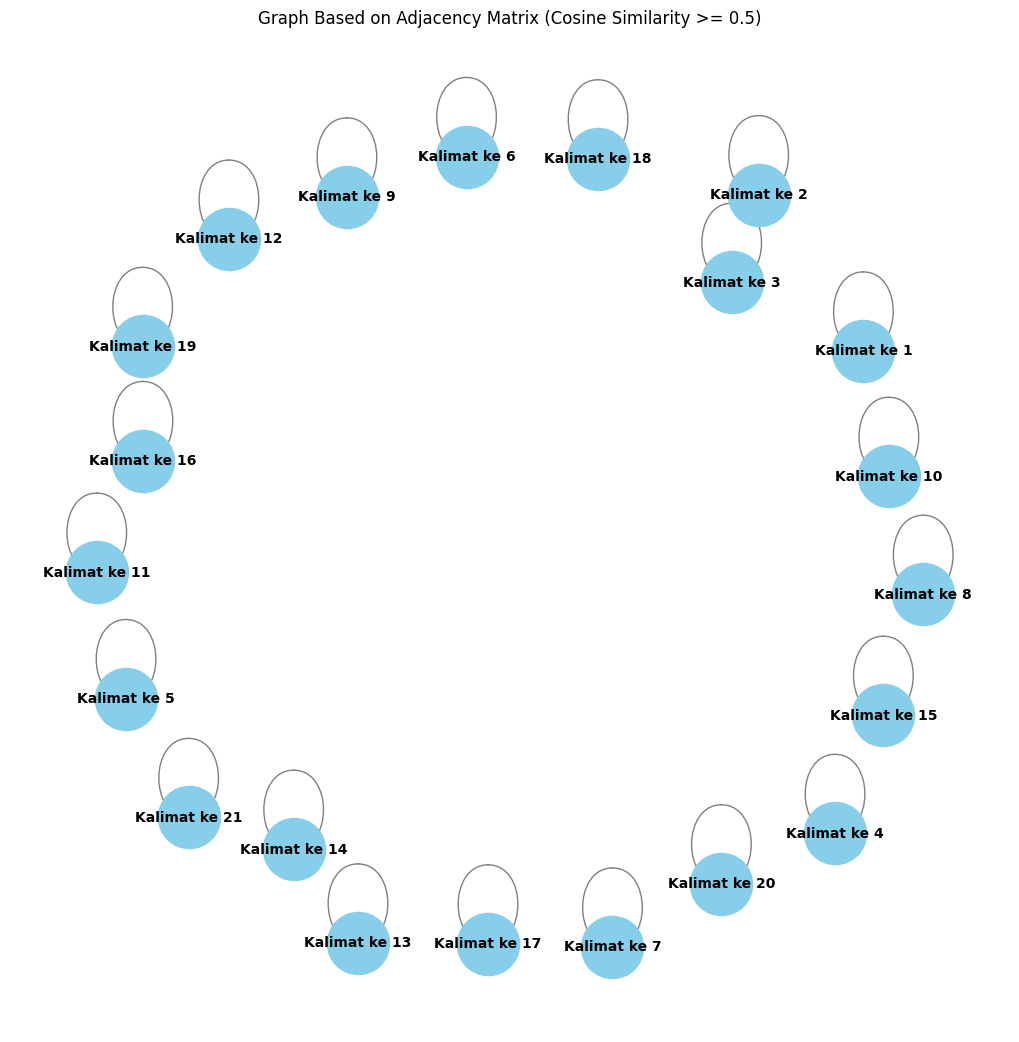

In [ ]:
# Buat graf dari matriks adjacency
G = nx.from_numpy_array(adjacency_matrix)

# Atur label node agar sesuai dengan 'kalimat ke n'
mapping = {i: f"Kalimat ke {i+1}" for i in range(len(result_df))}
G = nx.relabel_nodes(G, mapping)

# Menggambar graf
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Atur layout graf
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black', edge_color='gray', linewidths=1, font_weight='bold')

# Tampilkan graf
plt.title("Graph Based on Adjacency Matrix (Cosine Similarity >= 0.5)")
plt.show()

menghitung tiga jenis **centrality** pada graf yang dibangun sebelumnya untuk menganalisis seberapa penting atau berpengaruh setiap kalimat dalam struktur graf tersebut. Berikut penjelasan singkatnya:

1. **Betweenness Centrality**:
   - Mengukur seberapa sering sebuah node (kalimat) berada di jalur terpendek antara dua node lainnya. Node dengan nilai betweenness tinggi memiliki pengaruh besar dalam menghubungkan bagian-bagian graf lainnya.

2. **Degree Centrality**:
   - Mengukur jumlah hubungan langsung (edge) yang dimiliki oleh setiap node. Semakin banyak koneksi yang dimiliki suatu node (kalimat), semakin tinggi nilai degree centrality-nya.

3. **Closeness Centrality**:
   - Mengukur seberapa dekat sebuah node dengan semua node lainnya dalam graf. Semakin rendah jarak rata-rata ke semua node lain, semakin tinggi nilai closeness centrality-nya.

**Langkah-langkah kode**:
- Menghitung **betweenness**, **degree**, dan **closeness** centrality menggunakan fungsi dari **NetworkX**.
- Menyimpan hasilnya dalam dataframe untuk memudahkan analisis dan visualisasi.
- Dataframe `centrality_df` menampilkan kalimat bersama dengan nilai centrality untuk ketiga jenis tersebut.

**Tujuan**:
- Menganalisis kalimat mana yang memiliki pengaruh lebih besar dalam graf berdasarkan hubungan dan kedekatannya dengan kalimat lain.

In [ ]:
# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Menghitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Buat dataframe untuk menampilkan hasil centrality
centrality_df = pd.DataFrame({
    'Kalimat': list(betweenness_centrality.keys()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values())
})

# Tampilkan dataframe centrality
centrality_df

,Kalimat,Betweenness Centrality,Degree Centrality,Closeness Centrality
0,Kalimat ke 1,0.0,0.1,0.0
1,Kalimat ke 2,0.0,0.1,0.0
2,Kalimat ke 3,0.0,0.1,0.0
3,Kalimat ke 4,0.0,0.1,0.0
4,Kalimat ke 5,0.0,0.1,0.0
5,Kalimat ke 6,0.0,0.1,0.0
6,Kalimat ke 7,0.0,0.1,0.0
7,Kalimat ke 8,0.0,0.1,0.0
8,Kalimat ke 9,0.0,0.1,0.0
9,Kalimat ke 10,0.0,0.1,0.0


# Pengujian

Memproses teks berita yang dimasukkan oleh pengguna dan menganalisisnya menggunakan berbagai teknik analisis teks. Berikut adalah penjelasan singkat dari setiap bagian kode:

### 1. **Fungsi `process_news_input()`**
   - Fungsi ini menerima input teks berita dari pengguna.
   - **Pemisahan Kalimat**: Memecah berita menjadi kalimat-kalimat terpisah.
   - **Preprocessing**: Membersihkan teks dari URL, HTML, emoji, angka, simbol, dan melakukan proses case folding, tokenisasi, penghapusan stopwords, serta stemming.
   - **TF-IDF dan Cosine Similarity**: Menghitung representasi vektor TF-IDF untuk setiap kalimat, kemudian menghitung kemiripan antar kalimat menggunakan **cosine similarity**.
   - **Matriks Adjacency**: Menyusun matriks adjacency untuk menunjukkan hubungan antara kalimat jika cosine similarity lebih dari ambang batas tertentu.
   - **Graf dan Centrality**: Membuat graf berdasarkan matriks adjacency dan menghitung tiga jenis **centrality** (Betweenness, Degree, dan Closeness) untuk mengetahui kalimat yang paling berpengaruh.

### 2. **Interaksi dengan Pengguna**
   - Pengguna diminta untuk memasukkan berita sebagai teks.
   - Setelah itu, sistem memproses berita dan menghitung nilai centrality untuk setiap kalimat.
   - Pengguna dapat memilih jenis centrality yang ingin dihitung (Betweenness, Degree, atau Closeness).

### 3. **Output**
   - **Pemisahan Kalimat**: Menampilkan kalimat-kalimat yang telah dipisahkan dari teks.
   - **Cosine Similarity Matrix**: Menampilkan matriks kemiripan antara kalimat.
   - **Adjacency Matrix**: Menampilkan matriks yang menunjukkan hubungan antar kalimat.
   - **Graf**: Menampilkan graf berdasarkan hubungan antar kalimat.
   - **Centrality Values**: Menampilkan nilai centrality untuk setiap kalimat berdasarkan pilihan pengguna.
   - **Top 3 Kalimat**: Menampilkan tiga kalimat teratas berdasarkan nilai centrality yang dipilih oleh pengguna.

### Tujuan
- **Analisis Teks**: Untuk membantu pengguna menganalisis berita dan menemukan kalimat-kalimat yang memiliki pengaruh atau keterkaitan tinggi dalam teks berdasarkan berbagai ukuran centrality dalam graf.

Masukkan isi berita: motogp

Pilih jenis centrality yang ingin dihitung:
1. Betweenness Centrality
2. Degree Centrality
3. Closeness Centrality
Masukkan pilihan (1/2/3): 2

Hasil Pemisahan Kalimat:
   kalimat ke n kalimat   final
0  Kalimat ke 1  motogp  motogp

Cosine Similarity Matrix:
[[1.]]

Adjacency Matrix:
[[1]]

Graph:


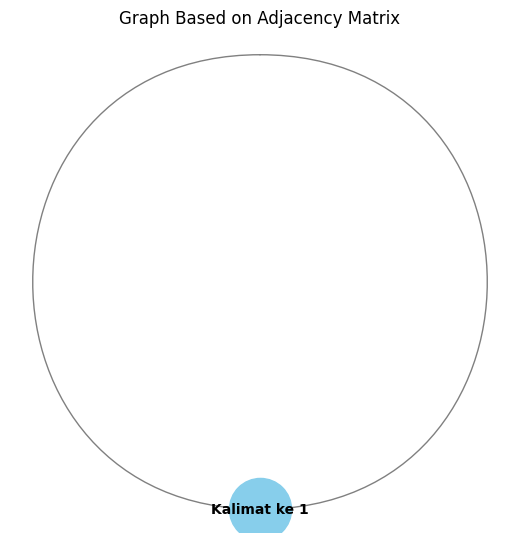


Nilai Centrality:
        Kalimat  Betweenness Centrality  Degree Centrality  \
0  Kalimat ke 1                     0.0                  1   

   Closeness Centrality  
0                   0.0  

Ringkasan (3 Kalimat Teratas Berdasarkan Degree Centrality):
        Kalimat  Degree Centrality
0  Kalimat ke 1                  1


In [ ]:
# Fungsi untuk memisahkan dan memproses berita
def process_news_input(user_input):
    # Memisahkan kalimat
    result_list = []
    sentences = user_input.split('.')  # Pisahkan kalimat berdasarkan titik
    sentences = [s.strip() for s in sentences if s.strip()]  # Hilangkan spasi berlebih dan kosong
    for i, sentence in enumerate(sentences, 1):
        result_list.append({'kalimat ke n': f"Kalimat ke {i}", 'kalimat': sentence})

    result_df = pd.DataFrame(result_list)

    # Fungsi preprocessing yang disesuaikan
    def remove_url(data_berita):
        url = re.compile(r'https?://\S+|www\.S+')
        return url.sub(r'', data_berita)

    def remove_html(data_berita):
        html = re.compile(r'<.#?>')
        return html.sub(r'', data_berita)

    def remove_emoji(data_berita):
        emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"
                                   u"\U0001F300-\U0001F5FF"
                                   u"\U0001F680-\U0001F6FF"
                                   u"\U0001F1E0-\U0001F1FF""]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', data_berita)

    def remove_numbers(data_berita):
        data_berita = re.sub(r'\d+', '', data_berita)
        return data_berita

    def remove_symbols(data_berita):
        data_berita = re.sub(r'[^a-zA-Z0-9\s]', '', data_berita)
        return data_berita

    def case_folding(text):
        if isinstance(text, str):
            return text.lower()
        return text

    def tokenize(text):
        return text.split()

    def remove_stopwords(text):
        return [word for word in text if word not in stop_words]

    # Inisialisasi stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    def stemming(text):
        return [stemmer.stem(word) for word in text]

    # Looping setiap kalimat di dataframe 'result_df'
    result_df['clean'] = result_df['kalimat'].apply(remove_url)
    result_df['clean'] = result_df['clean'].apply(remove_html)
    result_df['clean'] = result_df['clean'].apply(remove_emoji)
    result_df['clean'] = result_df['clean'].apply(remove_symbols)
    result_df['clean'] = result_df['clean'].apply(remove_numbers)
    result_df['clean'] = result_df['clean'].apply(case_folding)
    result_df['tokenize'] = result_df['clean'].apply(tokenize)
    result_df['stopword removal'] = result_df['tokenize'].apply(remove_stopwords)
    result_df['stemming'] = result_df['stopword removal'].apply(stemming)

    # Gabungkan kata setelah stemming
    result_df['final'] = result_df['stemming'].apply(lambda x: ' '.join(x))

    # TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(result_df['final'])

    # Cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix)

    # Matriks adjacency
    threshold = 0.6
    adjacency_matrix = np.where(cosine_sim >= threshold, 1, 0)

    # Buat graf dari matriks adjacency
    G = nx.from_numpy_array(adjacency_matrix)

    # Atur label node
    mapping = {i: f"Kalimat ke {i+1}" for i in range(len(result_df))}
    G = nx.relabel_nodes(G, mapping)

    # Hitung centrality
    betweenness_centrality = nx.betweenness_centrality(G)
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)

    # Buat dataframe untuk centrality
    centrality_df = pd.DataFrame({
        'Kalimat': list(betweenness_centrality.keys()),
        'Betweenness Centrality': list(betweenness_centrality.values()),
        'Degree Centrality': list(degree_centrality.values()),
        'Closeness Centrality': list(closeness_centrality.values())
    })

    return result_df[['kalimat ke n', 'kalimat', 'final']], cosine_sim, adjacency_matrix, G, centrality_df

# Input dari pengguna
user_input = input("Masukkan isi berita: ")

# Proses berita dan ambil hasil
result_df, cosine_sim, adjacency_matrix, G, centrality_df = process_news_input(user_input)

# Pilih jenis centrality untuk dihitung
print("\nPilih jenis centrality yang ingin dihitung:")
print("1. Betweenness Centrality")
print("2. Degree Centrality")
print("3. Closeness Centrality")
choice = int(input("Masukkan pilihan (1/2/3): "))

# Ambil centrality sesuai pilihan
if choice == 1:
    centrality_values = centrality_df[['Kalimat', 'Betweenness Centrality']]
    centrality_name = 'Betweenness Centrality'
elif choice == 2:
    centrality_values = centrality_df[['Kalimat', 'Degree Centrality']]
    centrality_name = 'Degree Centrality'
elif choice == 3:
    centrality_values = centrality_df[['Kalimat', 'Closeness Centrality']]
    centrality_name = 'Closeness Centrality'
else:
    print("Pilihan tidak valid.")
    exit()

# Ringkasan: 3 kalimat dengan centrality tertinggi
top_sentences = centrality_values.nlargest(3, centrality_name)

# Tampilkan hasil
print("\nHasil Pemisahan Kalimat:")
print(result_df)
print("\nCosine Similarity Matrix:")
print(cosine_sim)
print("\nAdjacency Matrix:")
print(adjacency_matrix)
print("\nGraph:")
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black', edge_color='gray', linewidths=1, font_weight='bold')
plt.title("Graph Based on Adjacency Matrix")
plt.show()
print("\nNilai Centrality:")
print(centrality_df)
print(f"\nRingkasan (3 Kalimat Teratas Berdasarkan {centrality_name}):")
print(top_sentences)